# Two Lines Meeting Four Given Lines

Given four lines in general position,
there are two lines which meet all four given lines.
With Pieri homotopies we can solve this Schubert problem.
For the verification of the intersection conditions, numpy is used.
The plots are made with matplotlib.

In [1]:
from random import seed

In [2]:
from numpy import zeros, array, concatenate, matrix
from numpy.linalg import det, solve

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from phcpy.solutions import coordinates
from phcpy.schubert import random_complex_matrix
from phcpy.schubert import pieri_root_count, run_pieri_homotopies
from phcpy.schubert import real_osculating_planes
from phcpy.schubert import make_pieri_system
from phcpy.trackers import double_track as track

PHCv2.4.88 released 2023-12-26 works!


## 1. Solving a General Instance

A random instance of the four given lines will lead to two solution lines.

In [5]:
(mdim, pdim, deg) = (2, 2, 0)
pcnt = pieri_root_count(mdim, pdim, deg, False)
pcnt

2

To setup the problem, some auxiliary functions are first defined.

In [6]:
def indices(name):
    """
    For the string name in the format xij
    return (i, j) as two integer indices.
    """
    return (int(name[1]), int(name[2]))

In [7]:
def solution_plane(rows, cols, sol):
    """
    Returns a sympy matrix with as many rows
    as the value of rows and with as many columns
    as the value of columns, using the string
    represention of a solution in sol.
    """
    result = zeros((rows, cols), dtype=complex)
    for k in range(cols):
        result[k][k] = 1
    (vars, vals) = coordinates(sol)
    for (name, value) in zip(vars, vals):
        i, j = indices(name)
        result[i-1][j-1] = value
    return result

In [8]:
def verify_determinants(inps, sols, verbose=True):
    """
    Verifies the intersection conditions with determinants,
    concatenating the planes in inps with those in the sols.
    Both inps and sols are lists of numpy arrays.
    Returns the sum of the absolute values of all determinants.
    If verbose, then for all solutions in sols, the computed
    determinants are printed to screen.
    """
    checksum = 0
    for sol in sols:
        if verbose:
            print('checking solution\n', sol)
        for plane in inps:
            cat = concatenate([plane, sol], axis=-1)
            mat = matrix(cat)
            dcm = det(mat)
            if verbose:
                print('the determinant :', dcm)
            checksum = checksum + abs(dcm)
    return checksum

In [9]:
def solve_general(mdim, pdim, qdeg):
    """
    Solves a general instance of Pieri problem, computing the
    p-plane producing curves of degree qdeg which meet a number
    of general m-planes at general interpolation points,
    where p = pdim and m = mdim on input.
    For the problem of computing the two lines which meet
    four general lines, mdim = 2, pdim = 2, and qdeg = 0.
    Returns a tuple with four lists.
    The first two lists contain matrices with the input planes
    and the solution planes respectively.
    The third list is the list of polynomials solved
    and the last list is the solution list.
    """
    dim = mdim*pdim + qdeg*(mdim+pdim)
    ranplanes = [random_complex_matrix(mdim+pdim, mdim) for _ in range(0, dim)]
    (pols, sols) = run_pieri_homotopies(mdim, pdim, qdeg, ranplanes)
    inplanes = [array(plane) for plane in ranplanes]
    outplanes = [solution_plane(mdim+pdim, pdim, sol) for sol in sols]
    return (inplanes, outplanes, pols, sols)

In [10]:
(inp, otp, pols, sols) = solve_general(mdim, pdim, deg)

The four input lines are represented as matrices.

In [11]:
for plane in inp:
    print(plane)

[[ 0.98771734-0.15625123j  0.52929265-0.84843933j]
 [ 0.0108879 -0.99994073j  0.43271012+0.90153311j]
 [ 0.670366  +0.74203061j  0.84995049-0.52686257j]
 [-0.99870177+0.05093886j  0.55311134-0.83310735j]]
[[ 0.1176291 +0.9930576j   0.73982601-0.67279824j]
 [-0.4096813 -0.91222872j  0.98222659+0.18769903j]
 [ 0.49367521+0.86964635j -0.00101345-0.99999949j]
 [ 0.99603164-0.0889999j   0.37233497-0.92809841j]]
[[-0.86632581+0.49947932j  0.99954174-0.03027052j]
 [ 0.26897023+0.96314849j  0.29943145+0.95411781j]
 [ 0.77919846-0.62677728j  0.52235751-0.85272659j]
 [ 0.4481898 +0.89393842j  0.97691942+0.21360816j]]
[[ 0.40705515-0.91340358j -0.66900116+0.74326136j]
 [-0.11164153+0.99374854j -0.51718407-0.8558742j ]
 [-0.01384859+0.9999041j  -0.38779064+0.92174748j]
 [ 0.32407475-0.94603148j  0.87995025-0.47506584j]]


In [12]:
print('The solution planes :')
for plane in otp:
    print(plane)

The solution planes :
[[ 1.        +0.j          0.        +0.j        ]
 [-0.64379718+0.67758706j  1.        +0.j        ]
 [ 0.69735824-0.15805905j -1.46030164-0.68747669j]
 [ 0.        +0.j         -1.74595349+0.00175246j]]
[[ 1.        +0.j          0.        +0.j        ]
 [ 1.4746012 +0.78327696j  1.        +0.j        ]
 [ 1.20071164-2.11957742j  0.91569812-1.31875637j]
 [ 0.        +0.j         -1.04202682+0.09584754j]]


In [13]:
check = verify_determinants(inp, otp)
print('Sum of absolute values of determinants :', check)

checking solution
 [[ 1.        +0.j          0.        +0.j        ]
 [-0.64379718+0.67758706j  1.        +0.j        ]
 [ 0.69735824-0.15805905j -1.46030164-0.68747669j]
 [ 0.        +0.j         -1.74595349+0.00175246j]]
the determinant : (2.9667224835639593e-15+1.3550262739027277e-15j)
the determinant : (4.195866422887001e-15-1.4293281742484199e-15j)
the determinant : (-1.8017495082844853e-15-1.5770416093056093e-15j)
the determinant : (-2.0927676352675787e-16+1.091663409852285e-15j)
checking solution
 [[ 1.        +0.j          0.        +0.j        ]
 [ 1.4746012 +0.78327696j  1.        +0.j        ]
 [ 1.20071164-2.11957742j  0.91569812-1.31875637j]
 [ 0.        +0.j         -1.04202682+0.09584754j]]
the determinant : (1.0002339027616943e-14-3.132413944024583e-14j)
the determinant : (2.8791053191246284e-14-3.6564204184655514e-15j)
the determinant : (-3.605052372912635e-14+5.874582883240587e-15j)
the determinant : (-2.6498852748806624e-14-2.7706915851697867e-15j)
Sum of absolute v

Observe that all determinants evaluate to numbers that are very close to the machine precision.

## 2. Four Real Lines

We can generate inputs for which all solutions are real.

In [14]:
def solve_real(mdim, pdim, start, sols):
    """
    Solves a real instance of Pieri problem, for input planes
    of dimension mdim osculating a rational normal curve.
    On return are the planes of dimension pdim.
    """
    oscplanes = real_osculating_planes(mdim, pdim, 0)
    target = make_pieri_system(mdim, pdim, 0, oscplanes, is_real=True)
    gamma, rtsols = track(target, start, sols)
    print('The solutions to the real problem :')
    for (idx, sol) in enumerate(rtsols):
        print('Solution', idx+1, ':') 
        print(sol)
    inplanes = [array(plane) for plane in oscplanes]
    outplanes = [solution_plane(mdim+pdim, pdim, sol) for sol in rtsols]
    return (inplanes, outplanes, target, rtsols)

For visualization, the seed of the random number generators is set fixed.

In [15]:
seed(400)

In [16]:
(oscp, otp2, pols2, sols2) = solve_real(mdim, pdim, pols, sols)

The solutions to the real problem :
Solution 1 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x21 : -2.84638025557899E-02   1.31371731030452E-46
 x32 : -1.19348750548289E-01  -2.62743462060903E-46
 x42 : -4.99706612461873E+00   2.38220738935219E-44
 x31 : -1.06771882518925E+00   3.15292154473084E-45
== err :  5.410E-15 = rco :  5.611E-03 = res :  5.551E-16 =
Solution 2 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x21 : -5.52734869685360E-02   5.47382212626882E-48
 x32 : -1.19348750548290E-01   4.37905770101505E-47
 x42 : -2.57330433323918E+00   3.83167548838817E-47
 x31 : -6.60558824288729E-01   1.91583774419409E-47
== err :  6.174E-16 = rco :  1.324E-02 = res :  3.747E-16 =


In [17]:
print('The input planes :')
for plane in oscp:
    print(plane)

The input planes :
[[-0.63223829 -0.07958136]
 [ 0.24317589 -0.42625018]
 [ 0.44517428  0.75891681]
 [-0.58562795  0.48582185]]
[[-0.63156273  0.07848797]
 [ 0.31098671 -0.49445305]
 [ 0.32529788  0.85734178]
 [-0.63134544  0.11966993]]
[[-0.66765465 -0.21150281]
 [-0.41782225 -0.46153796]
 [ 0.14470336 -0.77816698]
 [ 0.59893469 -0.36973696]]
[[-0.69033039  0.11246161]
 [-0.09104114 -0.32159814]
 [ 0.66631728 -0.28602371]
 [ 0.26678969  0.89561011]]


In [18]:
print('The solution planes :')
for plane in otp2:
    print(plane)

The solution planes :
[[ 1.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-0.0284638 +1.31371731e-46j  1.        +0.00000000e+00j]
 [-1.06771883+3.15292154e-45j -0.11934875-2.62743462e-46j]
 [ 0.        +0.00000000e+00j -4.99706612+2.38220739e-44j]]
[[ 1.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-0.05527349+5.47382213e-48j  1.        +0.00000000e+00j]
 [-0.66055882+1.91583774e-47j -0.11934875+4.37905770e-47j]
 [ 0.        +0.00000000e+00j -2.57330433+3.83167549e-47j]]


In [19]:
check = verify_determinants(oscp, otp2)
print('Sum of absolute values of determinants :', check)

checking solution
 [[ 1.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-0.0284638 +1.31371731e-46j  1.        +0.00000000e+00j]
 [-1.06771883+3.15292154e-45j -0.11934875-2.62743462e-46j]
 [ 0.        +0.00000000e+00j -4.99706612+2.38220739e-44j]]
the determinant : (2.7334976213462325e-15-2.490244814186718e-45j)
the determinant : (6.194410394095717e-15-2.4210378066256254e-45j)
the determinant : (6.1256567148522274e-15-4.974841059851325e-47j)
the determinant : (-1.7538510134158814e-15-1.6274706457865366e-45j)
checking solution
 [[ 1.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-0.05527349+5.47382213e-48j  1.        +0.00000000e+00j]
 [-0.66055882+1.91583774e-47j -0.11934875+4.37905770e-47j]
 [ 0.        +0.00000000e+00j -2.57330433+3.83167549e-47j]]
the determinant : (-6.163408511151722e-16-7.868415222942327e-49j)
the determinant : (3.1253636658440115e-16-1.6674497687062525e-48j)
the determinant : (-1.4639612348256832e-16-1.964057003033534e-47j)
the determinant : (-1.

## 3. Visualization

In [20]:
def input_generators(plane):
    """
    Given in plane is a numpy matrix, with in its columns
    the coordinates of the points which span a line, in 4-space.
    The first coordinate must not be zero.
    Returns the affine representation of the line,
    after dividing each generator by its first coordinate.
    """
    pone = list(plane[:,0])
    ptwo = list(plane[:,1])
    aone = [x/pone[0] for x in pone]
    atwo = [x/ptwo[0] for x in ptwo]
    return (aone[1:], atwo[1:])

In [21]:
def output_generators(plane):
    """
    Given in plane is a numpy matrix, with in its columns
    the coordinates of the points which span a line, in 4-space.
    The solution planes follow the localization pattern
    1, *, *, 0 for the first point and 0, 1, *, * for
    the second point, which means that the second point
    in standard projective coordinates lies at infinity.
    For the second generator, the sum of the points is taken.
    The imaginary part of each coordinate is omitted.
    """
    pone = list(plane[:,0])
    ptwo = list(plane[:,1])
    aone = [x.real for x in pone]
    atwo = [x.real + y.real for (x, y) in zip(pone, ptwo)]
    return (aone[1:], atwo[1:])

In [22]:
def boxrange(inlines, outlines):
    """
    Returns a list of three lists with the [min, max]
    values of each coordinate of each generator in the lists
    inlines and outlines.
    The ranges are adjusted for the particular real case.
    """
    fst = inlines[0][0]
    result = {'xmin': fst[0], 'xmax': fst[0], \
              'ymin': fst[1], 'ymax': fst[1], \
              'zmin': fst[2], 'zmax': fst[2]} 
    pts = [x for (x, y) in inlines] + [y for (x, y) in inlines] \
        + [x for (x, y) in outlines] + [y for (x, y) in outlines]
    print('the points :\n', pts)
    for point in pts:
        result['xmin'] = min(result['xmin'], point[0])
        result['ymin'] = min(result['ymin'], point[1])
        result['zmin'] = min(result['zmin'], point[2])
        result['xmax'] = max(result['xmax'], point[0])
        result['ymax'] = max(result['ymax'], point[1])
        result['zmax'] = max(result['zmax'], point[2])
    return ((result['xmin']+3, result['xmax']-3), \
            (result['ymin']+8, result['ymax']-11), \
            (result['zmin']+3, result['zmax']-5))

In [23]:
def inbox(point, lims):
    """
    Returns true if the coordinates of the point
    are in the box defined by the 3-tuple lims
    which contain the minima and maxima for the coordinates.
    """
    tol = 1.0e-8 # this is essential for roundoff
    (xlim, ylim, zlim) = lims
    if point[0] < xlim[0] - tol:
        return False
    elif point[0] > xlim[1] + tol:
        return False
    elif point[1] < ylim[0] - tol:
        return False
    elif point[1] > ylim[1] + tol:
        return False
    elif point[2] < zlim[0] - tol:
        return False
    elif point[2] > zlim[1] + tol:
        return False
    else:
        return True

In [24]:
def equal(pt1, pt2):
    """
    Returns true if the all coordinates of pt1 and pt2
    match up to a tolerance of 1.0e-10.
    """
    tol = 1.0e-8
    if abs(pt1[0] - pt2[0]) > tol:
        return False
    elif abs(pt1[1] - pt2[1]) > tol:
        return False
    elif abs(pt1[2] - pt2[2]) > tol:
        return False
    return True

In [25]:
def isin(points, pnt):
    """
    Returns true if pnt belongs to the list points.
    """
    if len(points) == 0:
        return False
    else:
        for point in points:
            if equal(point, pnt):
                return True
        return False;

In [26]:
def plot_line(axs, line, lims, color):
    """
    Plots the line defined as a tuple of two points,
    using the axis object in axs.
    The 3-tuple lims contains three lists with limits [min, max]
    for the x, y, and z coordinates.
    """
    (fst, snd) = line
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    axs.set_zlabel('z')
    axs.set_xlim(lims[0])
    axs.set_ylim(lims[1])
    axs.set_zlim(lims[2])
    dir = (fst[0] - snd[0], fst[1] - snd[1], fst[2] - snd[2])
    result = []
    for k in range(3):
        fac = (lims[k][1]-fst[k])/dir[k]
        pnt = (fst[0] + fac*dir[0], fst[1] + fac*dir[1], fst[2] + fac*dir[2])
        if inbox(pnt, lims):
            if not isin(result, pnt): result.append(pnt)
    for k in range(3):
        fac = (lims[k][0]-fst[k])/dir[k]
        pnt = (fst[0] + fac*dir[0], fst[1] + fac*dir[1], fst[2] + fac*dir[2])
        if inbox(pnt, lims):
            if not isin(result, pnt): result.append(pnt)
    (one, two) = (result[0], result[1])
    # axs.plot([fst[0], snd[0]], [fst[1], snd[1]], [fst[2], snd[2]], 'bo')
    # axs.plot([one[0], two[0]], [one[1], two[1]], [one[2], two[2]], 'ro')
    axs.plot([one[0], two[0]], [one[1], two[1]], [one[2], two[2]], color)
    plt.savefig('fourlinesfig1')

In [27]:
def plot_lines(inlines, outlines, points, lims):
    """
    Generates coordinates of the points in a random line
    and then plots this line.  The intersection points are
    in the list points and limits for the bounding box in lims
    """
    fig = plt.figure()
    axs = fig.add_subplot(111, projection='3d')
    for line in inlines:
        plot_line(axs, line, lims, 'b')
    for line in outlines:
        plot_line(axs, line, lims, 'r')
    for point in points:
        axs.plot([point[0]], [point[1]], [point[2]], 'ro')
    axs.view_init(azim=5, elev=20)
    plt.show()
    plt.savefig('fourlinesfig2')

In [28]:
def intersection_point(apl, bpl, check=True):
    """
    Given in apl the two points that define a line
    and in bpl the two points that define another line,
    returns the intersection point.
    If check, then additional tests are done
    and the outcome of the tests is written to screen.
    """
    (apt, bpt) = apl
    (cpt, dpt) = bpl
    mat = array([[apt[0], bpt[0], -cpt[0]], \
                 [apt[1], bpt[1], -cpt[1]], \
                 [apt[2], bpt[2], -cpt[2]]])
    rhs = array([[dpt[0]], [dpt[1]], [dpt[2]]])
    sol = solve(mat, rhs)
    cff = list(sol[:,0])
    csm = cff[0] + cff[1]
    result = ((cff[0]*apt[0] + cff[1]*bpt[0])/csm, \
              (cff[0]*apt[1] + cff[1]*bpt[1])/csm, \
              (cff[0]*apt[2] + cff[1]*bpt[2])/csm)
    if check:
        csm = cff[2] + 1.0
        verify = ((cff[2]*cpt[0] + dpt[0])/csm, \
                  (cff[2]*cpt[1] + dpt[1])/csm, \
                  (cff[2]*cpt[2] + dpt[2])/csm)
        print('the solution :\n', result)
        print('the solution verified :\n', verify)
        res = matrix(rhs) - matrix(mat)*matrix(sol)
        print('the residual :\n', res)
    return result

In [29]:
def intersection_points(ipl, opl):
    """
    Returns the list of intersection points between
    the input planes in ipl and the output planes in opl.
    """
    result = []
    for inplane in ipl:
        for outplane in opl:
            result.append(intersection_point(inplane, outplane))
    return result

In [30]:
def show_planes(ipl, opl):
    """
    Shows the input and the output planes.
    """
    (inlines, outlines) = ([], [])
    for plane in ipl:
        inlines.append(input_generators(plane))
    for plane in opl:
        outlines.append(output_generators(plane))
    print('The generators of the input lines :')
    for line in inlines:
        print(line)
    print('The generators of the output lines :')
    for line in outlines:
        print(line)
    brg = boxrange(inlines, outlines)
    print('the range:', brg)
    intpts = intersection_points(inlines, outlines)
    print('the intersection points :')
    for point in intpts:
        print(point)
    plot_lines(inlines, outlines, intpts, brg)
    plt.savefig('fourlinesfig3')

We end up with an interactive backend for the 3d plot.

The generators of the input lines :
([-0.3846269613221122, -0.7041242012482366, 0.9262772651610497], [5.356155982058531, -9.53636379773747, -6.104719131981401])
([-0.4924082638753003, -0.5150682033346254, 0.9996559434380463], [-6.2997304815421655, 10.923225600528575, 1.5246914154709972])
([0.6258059455871108, -0.2167338369356443, -0.8970725931155779], [2.1821835337633937, 3.6792275561013374, 1.7481420529767318])
([0.13188052906200864, -0.9652150521086493, -0.3864666725234145], [-2.8596260453517486, -2.5433009310133032, 7.963696648872165])
The generators of the output lines :
([-0.0284638025557899, -1.06771882518925, 0.0], [0.97153619744421, -1.187067575737539, -4.99706612461873])
([-0.055273486968536, -0.660558824288729, 0.0], [0.944726513031464, -0.779907574837019, -2.57330433323918])
the points :
 [[-0.3846269613221122, -0.7041242012482366, 0.9262772651610497], [-0.4924082638753003, -0.5150682033346254, 0.9996559434380463], [0.6258059455871108, -0.2167338369356443, -0.897072593115577

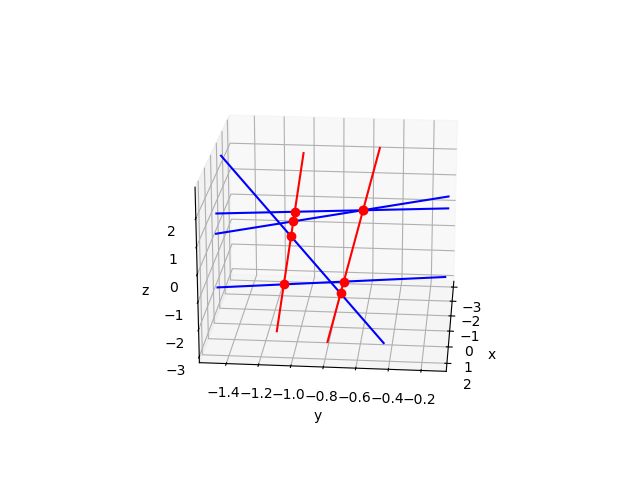

In [31]:
%matplotlib widget
show_planes(oscp, otp2)